In [14]:
import pandas as pd
df=pd.read_csv('data/churn_train.csv')
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [48]:
%matplotlib inline

In [15]:
#df['last_trip_date']=pd.to_datetime(df['last_trip_date'])
churn_date=pd.to_datetime(({'year': [2014],'month': [6],'day': [1]}))


In [5]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [12]:
import numpy as np
df['churn'] = df['last_trip_date'].apply(lambda x: x >= churn_date)
df['churn'] = np.where(df['churn'] ==True, '0', '1')
df.head()
#1 here means the riders have churned
#0 here means the riders haven't churned

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,1
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,1
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,1
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,1
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [20]:
df.isnull().values.any()

True

In [21]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       162
avg_rating_of_driver      6528
avg_surge                    0
city                         0
last_trip_date               0
phone                      319
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

In [22]:
df.phone = df.phone.fillna('no_phone')

In [23]:
#Convert columns with categorical data into categorical type
df.city = df.city.astype("category")
df.phone = df.phone.astype('category')

In [24]:
#checking the above conversion
pd.crosstab(df.phone, df.city)

city,Astapor,King's Landing,Winterfell
phone,,,
Android,4214,2024,5815
iPhone,8924,6066,12638
no_phone,98,54,167


In [25]:
#performing check on dates-as a part of EDA
np.any(df.last_trip_date < df.signup_date)#as it should be last_trip_date is greater than signup_date

False

In [33]:
df.signup_date.describe()

count          40000
unique            31
top       2014-01-18
freq            2393
Name: signup_date, dtype: object

In [39]:
#the following format has cleared the assertion error that I was getting pd.to_datetime while trying to get more cleaner
#date version of last_trip_date and signup_date
df.last_trip_date = pd.to_datetime(df.last_trip_date, format="%Y/%m/%d")
df.signup_date = pd.to_datetime(df.signup_date, format="%Y/%m/%d")

In [40]:
df['last_trip_date'].head()

0   2014-05-03
1   2014-01-26
2   2014-05-21
3   2014-01-10
4   2014-05-13
Name: last_trip_date, dtype: datetime64[ns]

In [41]:
#trying to figure out monthly details
df['last_year'] = df.last_trip_date.apply(lambda x: x.year)
df['last_month'] = df.last_trip_date.apply(lambda x: x.month)
pd.crosstab(df.last_month, df.last_year)

last_year,2014
last_month,
1,8172
2,3424
3,3626
4,3658
5,6088
6,14595
7,437


In [42]:
#Let's take a look at June to see what is going on day by day
dftmp = df[df.last_month == 6]
dftmp['last_day'] = dftmp.last_trip_date.apply(lambda x: x.day)
dftmp.last_day.value_counts()

/Users/chidam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


29    1632
28    1317
30    1127
27     898
22     807
21     681
26     641
14     545
15     524
20     487
25     477
23     448
7      436
8      435
1      397
24     360
19     350
13     345
18     316
12     285
16     254
6      253
17     241
11     231
9      203
5      199
4      199
10     197
2      171
3      139
Name: last_day, dtype: int64

In [47]:
#some statistics - received error while finding the statistics
#df.groupby([['churn', 'last_month']]).quantile(q=0.5)

In [49]:
#I have done this differently but adding a column based on start_date for visualization purpose
start_date = pd.to_datetime('2014-07-01', format='%Y-%m-%d')

In [51]:
import datetime
start_date = start_date - datetime.timedelta(30,0,0)
start_date

Timestamp('2014-06-01 00:00:00')

In [52]:
#going to add a column to identify active customers
df['is_active'] = (start_date < df.last_trip_date)

In [53]:
df.is_active.value_counts(dropna=False)

False    25365
True     14635
Name: is_active, dtype: int64

In [57]:
#visualizing by plotting active users as red and inactive (churn) as blue. it didn't work
# from pandas.plotting import scatter_matrix
# core_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 
#                  'surge_pct', 'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct']
# colors = ['red' if ix else 'blue' for ix in df.is_active]

In [ ]:
#scatter plot visualization - interpretation
# The scatter matrix does not show any feature which will clearly separate out active vs. inactive users. Some features do seem to help. Thus, we probably have a highly non-linear relationship and should consider a random forest or gradient boosted decision tree, which are ensemble versions of a decision tree. With a lot of feature engineering, we might be able to get comparable performance from logistic regression. SVM almost certainly will not work because there is no clear separation of postive and negative calsses.
# There seems to be some observations where surge_pct = (+/-) weekday_pct. May merit further investigation or signal a data feed/entry problem.

In [59]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       162
avg_rating_of_driver      6528
avg_surge                    0
city                         0
last_trip_date               0
phone                        0
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
last_year                    0
last_month                   0
is_active                    0
dtype: int64

In [60]:
#in order to find how many of avg_rating_of_driver and avg_rating_by_driver are missing i have to check info on df without totaling the sum of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null category
last_trip_date            40000 non-null datetime64[ns]
phone                     40000 non-null category
signup_date               40000 non-null datetime64[ns]
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
last_year                 40000 non-null int64
last_month                40000 non-null int64
is_active                 40000 non-null bool
dtypes: bool(2), category(2), datetime64[ns](2), float64(6), int64(3)
memory usage: 3.5 MB


In [62]:
#two columns: avg_rating_by_driver and avg_rating_of_driver seem to have Nan values
#the non_null values of the two columns are as follows:
# avg_rating_by_driver      39838 
# avg_rating_of_driver      33472

#because a considerable number of values are missing in avg_rating_of_driver focusing on that now to get a percentage of values
#that are missing - approximately 19.5% missing so it's not a good idea to drop those values.
(6528/33472)*100

19.50286806883365

In [67]:
#Would be nice to just do a simple t-test to see if distribution of features is different for rows with/without missing values.
# Calculate the T-test for the means of two independent samples of scores.

# This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.
# This test assumes that the populations have identical variances by default.
# We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores.
# If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.


import scipy.stats
def ttest_by(vals, by):
    vals1 = vals[by]
    vals2 = vals[-by]
    return scipy.stats.ttest_ind(vals1, vals2)



In [68]:
ttest_by(df.avg_dist, pd.isnull(df.avg_rating_of_driver))

Ttest_indResult(statistic=26.0119633761209, pvalue=6.194561708260528e-148)

In [69]:
ttest_by(df.avg_dist, pd.isnull(df.avg_rating_by_driver))

Ttest_indResult(statistic=1.2193684641273346, pvalue=0.22271156421529795)

In [70]:
# Result of t-test:
# We can reject H0: of no difference only for case where values in avg_rating_of_driver are missing. 

#We have a couple options for handling missing data: drop the rows if there are only a few or they are missing at random, 
#impute the missing values, or bin the feature by quantiles (typically deciles) + a bin for missing.

df['b_no_rating_of_driver'] = pd.isnull(df.avg_rating_of_driver)


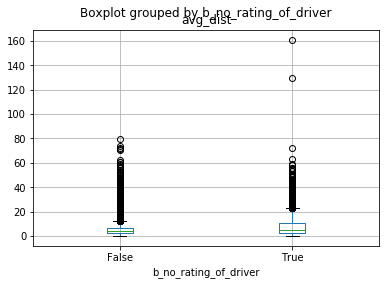

In [71]:
df.boxplot('avg_dist', by='b_no_rating_of_driver')

In [72]:
#So I can remove the rows with null values in the column: avg_rating_by_driver
df2 = df[(pd.notnull(df.avg_rating_by_driver))]

In [73]:
df2.isnull().sum()

avg_dist                     0
avg_rating_by_driver         0
avg_rating_of_driver      6471
avg_surge                    0
city                         0
last_trip_date               0
phone                        0
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
last_year                    0
last_month                   0
is_active                    0
b_no_rating_of_driver        0
dtype: int64

In [77]:
 # Simple check
churn_date=pd.to_datetime(({'year': [2014],'month': [6],'day': [1]}))
import numpy as np
df['churn'] = df['last_trip_date'].apply(lambda x: x >= churn_date)

In [78]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,last_year,last_month,is_active,b_no_rating_of_driver,churn
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,2014,5,False,False,False
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,2014,1,False,False,False
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,2014,5,False,True,False
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,2014,1,False,True,False
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,2014,5,False,True,False


In [84]:
#summary statistics based on status: active or not
#hopeful that the variation in the data will help us build a model.
df.groupby('is_active').describe()

avg_dist                                                     \
             count      mean       std  min   25%   50%   75%     max   
is_active                                                               
False      25365.0  6.183763  6.224828  0.0  2.32  4.03  7.76  129.89   
True       14635.0  5.111099  4.600695  0.0  2.57  3.73  5.88  160.96   

          avg_rating_by_driver            ...   trips_in_first_30_days         \
                         count      mean  ...                      75%    max   
is_active                                 ...                                   
False                  25233.0  4.786327  ...                      2.0   73.0   
True                   14605.0  4.762068  ...                      4.0  125.0   

          weekday_pct                                                       
                count       mean        std  min   25%   50%    75%    max  
is_active                                                                   
False         25365.0  60.170857  40.964395  0.0  16.7  66.7  100.0  100.0  
True          14635.0  62.093714  29.140859  0.0  45.5  65.0   85.7  100.0  

[2 rows x 72 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117fc5a58>,
      dtype=object)

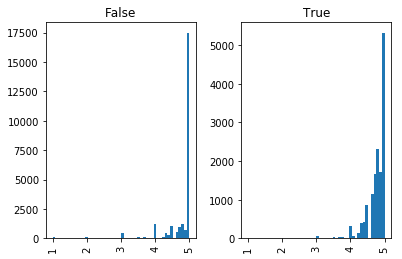

In [85]:
#question to ask: drivers provided 
df.avg_rating_by_driver.hist(bins=50, histtype='bar', by=df.is_active, stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11894ae80>,
      dtype=object)

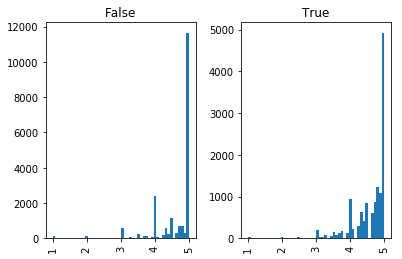

In [86]:
#inactive users are providing high ratings for drivers as it's not very frequent for them to hail a ride
# as can be seen from the pic below the density of 5-star ratings is pretty thin and a lot of traffic can be seen between
# the 4-star and 5-star ratings in the True section. so it can be assumed that ratings are categorized perhaps as 4.2, 4.3, 4.4 ...?


df.avg_rating_of_driver.hist(bins=50, histtype='bar', by=df.is_active, stacked=True)